<a href="https://colab.research.google.com/github/lyeslehara1996/PFE/blob/main/SentimentsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install np_utils  


In [107]:
pip install requests

In [152]:
#declaration des module 

import pandas as pd 
import re 
import nltk

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout

from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string 

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

nltk.download('stopwords')
from tensorflow.keras.utils import to_categorical


SAVE_FILE = False

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#affichage de data frame 

df=pd.read_excel('/content/SemEval2017.xlsx')
df.head()

,id,polariy,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,619971047195044992,negative,If these runway renovations at the airport pre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,619974445185302016,neutral,If you could ask an onstage interview question...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("Unnamed: 7", axis=1, inplace=True)
df.drop("Unnamed: 8", axis=1, inplace=True)
df.drop("Unnamed: 9", axis=1, inplace=True)
df.drop("Unnamed: 10", axis=1, inplace=True)
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)
df.drop("Unnamed: 13", axis=1, inplace=True)
df.drop("Unnamed: 14", axis=1, inplace=True)
df.drop("Unnamed: 15", axis=1, inplace=True)

In [6]:
df.head()

,id,polariy,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


In [7]:
df.polariy.value_counts()

neutral     10342
positive     7059
negative     3231
Name: polariy, dtype: int64

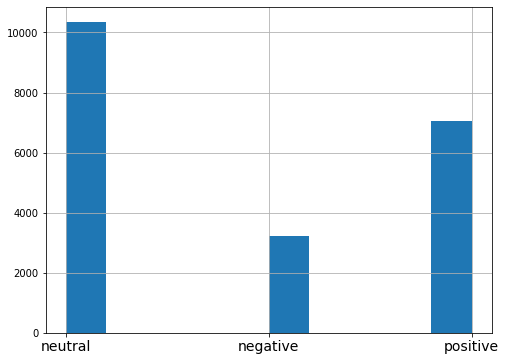

In [8]:
plt.figure(figsize=(8,6))
df.polariy.hist(xlabelsize=14)
plt.show()

In [9]:
df_clean = df
df_clean.Comments=df_clean.Comments.str.lower()
df_clean.head()

,id,polariy,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...


**Prétraitement**

Suppression des symbole


In [139]:
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'@mention', ' ', x))
df_clean.Comments = df_clean.Comments.apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>3 ))
df_clean

,id,polariy,Comments
0,619950566786113024,neutral,picturehouse pink floyd roger waters walll ope...
1,619969366986235008,neutral,order watchman store website tuesday half pric...
2,619971047195044992,negative,runway renovations airport prevent seeing tayl...
3,619974445185302016,neutral,could onstage interview question miss tomorrow...
4,619987808317406976,positive,portion book sales harper watchman release par...
...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal think asking order future drak...
20629,681879579129200000,positive,iran ranks liver surgeries allah bless country
20630,681883903259357056,neutral,hours arrived saudi arabia tuesday turkish pre...
20631,681904976860327040,negative,vanityfair alex kardashian worth love kardashi...


In [140]:
df_clean.polariy = df_clean.polariy.apply(lambda x: re.sub(r'https?:\/\/\S+><', ' ', str(x)))

Suppression des stop word

In [141]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [142]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df_clean['Comments']=df_clean['Comments'].apply(remove_stopwords)

{'a', 'for', 'shouldn', 'same', 'your', "weren't", 'itself', 'is', 'does', 're', "haven't", 'down', 'did', "should've", 'had', 'm', 'ain', 'yours', 'hadn', 'will', 'few', "you're", 'of', 'some', 'between', 'having', 'who', 'nor', "didn't", 'such', 't', 'in', 'into', 'not', 'wouldn', "don't", "needn't", 'll', 'you', 'she', 'then', 'all', 'was', 'which', 'or', "that'll", 'on', 'yourself', 'doesn', 'under', 'about', 'only', 'can', 'whom', 'ma', 'while', 'am', "wasn't", 'there', 'once', 'below', 'until', 'from', 'ourselves', "mightn't", 'very', 'no', 'above', 'it', 'during', 'more', 'after', 'both', 'their', 'so', 'where', 'too', 'shan', 'against', "shan't", 'with', 'doing', "wouldn't", 'they', 'are', 'through', 'any', 'here', 'theirs', "you'd", 'wasn', 'y', 'if', 'd', 'weren', 'mustn', 'be', "hasn't", 'haven', "you'll", 'should', 'to', 'won', 'needn', 'how', 've', 'we', 'by', 'than', "you've", 'its', 'do', "isn't", 'couldn', 'hasn', "she's", 'aren', 'these', 'and', 'over', 'just', 'himsel

In [151]:
reviews =  df_clean['Comments']
labels =  df_clean[['polariy']]
reviews

0        picturehouse pink floyd roger waters walll ope...
1        order watchman store website tuesday half pric...
2        runway renovations airport prevent seeing tayl...
3        could onstage interview question miss tomorrow...
4        portion book sales harper watchman release par...
                               ...                        
20628    shaquillehoneal think asking order future drak...
20629       iran ranks liver surgeries allah bless country
20630    hours arrived saudi arabia tuesday turkish pre...
20631    vanityfair alex kardashian worth love kardashi...
20632    guess even pandora knows justin bieber grown c...
Name: Comments, Length: 20633, dtype: object

In [145]:
##Encoder les polarity 

encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
encoded_labels = to_categorical(encoded_labels)

encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [146]:
#convertir au chiffre pour avoir implementer le model 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [148]:
#Encoder les reviews

max_word =40000
maxlen=128
tokenizer = Tokenizer(num_words=40000, split=' ')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X,padding='post', maxlen=maxlen)
X[:2]

array([[10134,  1308,   189,  2523,  6931, 10135,   651,   279,   390,
         5412,    34,   871,   245,   250,   184,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [149]:

X_train, X_test, Y_train, Y_test =  train_test_split(X, encoded_labels, test_size=0.20, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16506, 128) (16506, 4)
(4127, 128) (4127, 4)


In [133]:
Y_train
Y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [134]:


model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(maxlen,3)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [135]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 128, 50)           10800     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128, 50)           0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128, 50)           0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128, 50)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 128, 1)          

In [136]:
history=model.fit(X_train,Y_train,batch_size=128, epochs=10, verbose=1,validation_data=(X_test,Y_test))


Epoch 1/10


ValueError: ignored